In [20]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()

In [21]:
df = pd.read_csv("fcc-forum-pageviews.csv")

# Part 1

In [4]:
df = df[(df["value"] > df["value"].quantile(0.025)) &
       (df["value"] < df["value"].quantile(0.975))]

Text(0, 0.5, 'Page Views')

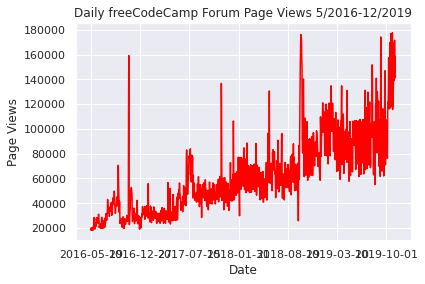

In [5]:
fg = df.plot.line("date", "value", color = "red", title = "Daily freeCodeCamp Forum Page Views 5/2016-12/2019", legend = False)
fg.set_xlabel("Date")
fg.set_ylabel("Page Views")

# Part 2

In [6]:
df["date"] = pd.to_datetime(df['date'])

In [7]:
df["year"] = df["date"].dt.year
df["month"] = df["date"].dt.month

In [8]:
df['month'] = pd.to_datetime(df['month'], format='%m').dt.month_name().str.slice(stop=3)

In [9]:
df = df.reindex(columns = ["year", "month", "date", "value"])

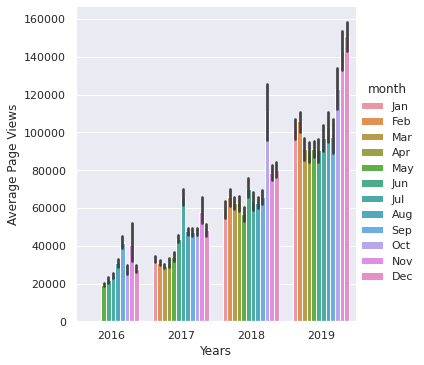

In [19]:
months = ["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"]
ax = sns.catplot(data = df, kind = "bar", y = "value", x = "year", hue = "month", hue_order = months).set(xlabel = "Years", ylabel = "Average Page Views")

# Part 3

[Text(0.5, 0, 'Month'),
 Text(0, 0.5, 'Page Views'),
 Text(0.5, 1.0, 'Month-wise Box Plot (Seasonality)')]

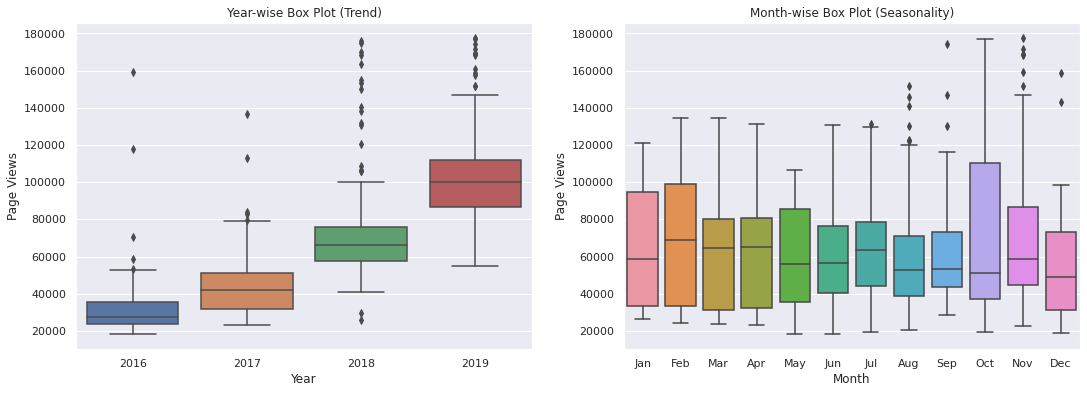

In [17]:
fig, axes = plt.subplots(1,2, figsize = (18,6))
sns.boxplot(ax = axes[0], data = df, x = "year", y = "value").set(xlabel = "Year", ylabel = "Page Views", title = "Year-wise Box Plot (Trend)")
sns.boxplot(ax = axes[1], data = df, x = "month", y = "value", order = months).set(xlabel = "Month", ylabel = "Page Views", title = "Month-wise Box Plot (Seasonality)")